# **Aprendizaje no supervisado**
# UL06. Principal Component Analysis (PCA)

## <font color='blue'>**Métodos lineales de reducción**</font>

En este notebook, se presentará el  Análisis de Componentes Principales (PCA) para reducción de dimensionalidad y extracción de características.

El método tiene implementaciones listas para usar en `scikit-learn`, sin embargo, el propósito de este notebook  es desarrollar una intuición profunda del algoritmo en base a su implementacíon desde cero. Utilizaremos solo OpenCV para abrir y guardar imágenes, y NumPy para manejar matrices.

## <font color='blue'>**Principal Component Analysis (PCA)**</font>

Principal Component Analysis (PCA) es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información. Supóngase que existe una muestra con $n$ individuos cada uno con $p$ variables aleatorias $(X_1, X_2, …, X_p)$, es decir, el espacio muestral tiene $p$ dimensiones. PCA permite encontrar un número de factores subyacentes ($z<p$) que explican aproximadamente lo mismo que las p variables originales. Donde antes se necesitaban $p$ valores para caracterizar a cada individuo, ahora bastan $z$ valores. Cada una de estas $z$ nuevas variables recibe el nombre de componente principal. Esta tecnica pertenece a la familia de aprendizaje no supervisado.

PCA aborda esta tarea mediante la identificación de componentes principales, que son combinaciones lineales de las características originales. Estos componentes se extraen de modo que el primer componente principal encapsula la varianza máxima en el conjunto de datos, el segundo encapsula la varianza restante mientras no está correlacionado con el primero, y así sucesivamente.

La utilidad de PCA radica en los siguientes tres beneficios principales:

1. Reduce el tiempo de entrenamiento, debido a un conjunto de datos más pequeño.
2. Elimina el ruido al mantener solo lo relevante.
3. Hace posible la visualización, en los casos en que tiene un máximo de 3 componentes principales.

## La intuición

¿Como proyectamos a una dimensión maximizando la varianza?

<img src='https://drive.google.com/uc?export=view&id=1RgWr0oVb1ctZ_PlNBI-YbvpWQbxkuetY' width="600" align="left" style="margin-right: 20px">
<br clear="left">


¿Y en este caso?

<img src='https://drive.google.com/uc?export=view&id=1IZcDhrZ2S4YEnxIvvxUp4iUmlkTzNYEK' width="600" align="left" style="margin-right: 20px">
<br clear="left">


En la imagen, los puntos representan datos distribuidos en un espacio bidimensional, y se observa cómo se busca proyectar los puntos a una **nueva dirección** (línea azul) que maximiza la **varianza** de los datos al reducirlos a una dimensión. Hay dos formas de hacer esto:

---

### **1. Problema de Maximización de la Varianza**

El objetivo es encontrar un **vector $ U_1 $** que **maximice la varianza** de los datos proyectados sobre esta dirección. Esto se puede modelar como un problema de optimización:

$$
\max_{v_1} \left( \frac{1}{n} \sum_{i=1}^n (U_1^T x_i - U_1^T \bar{x})^2 \right)
$$
  
Si asumimos que la media $\bar{x} = 0$, la expresión se simplifica a:
$$
\max_{v_1} \left( \frac{1}{n} \sum_{i=1}^n (U_1^T x_i)^2 \right)
$$
  
**Restricción:**
$$
||U_1|| = 1
$$

Este enfoque se denomina **variance maximization approach** (enfoque de maximización de la varianza).


**Desarrollo de la Expresión:**

Al desarrollar el cuadrado de la proyección:
$$
\frac{1}{n} \sum_{i=1}^n (U_1^T x_i)^2 = U_1^T \frac{(X^T X)}{n} U_1
$$

Donde:
- $ X^T X / n $ es la **matriz de covarianza** de los datos.
- El vector $ U_1 $ es el **autovector** correspondiente al **autovalor máximo** de la matriz de covarianza.

---

### **2. Problema de Minimización de la Distancia**

Otra forma de interpretar PCA es como un problema de **minimización del error de proyección**. En este enfoque, se busca minimizar la distancia perpendicular desde cada punto $ x_i $ hasta la línea definida por $ U_1 $:

$$
d^2 = ||x_i||^2 - (U_1^T x_i)^2
$$

Reemplazando y desarrollando:
$$
d^2 = (x_i^T x_i) - (U_1^T x_i)^2
$$

**Problema de optimización:**
$$
\min_{U_1} \sum_{i=1}^n (x_i^T x_i) - (U_1^T x_i)^2
$$

**Restricción:**
$$
||U_1|| = 1
$$

---

Las dos formulaciones (maximización de la varianza y minimización de la distancia) conducen al mismo resultado: el vector $ U_1 $ que define la **dirección principal** (primera componente principal) es el **autovector asociado al autovalor máximo** de la matriz de covarianza de los datos.

Esta dirección es aquella que captura la mayor cantidad de información (varianza) de los datos proyectados.



Para profundizar en este tema, puedes consultar el siguiente artículo:  
[Mathematics Behind Principal Component Analysis (PCA)](https://medium.com/analytics-vidhya/mathematics-behind-principal-component-analysis-pca-1cdff0a808a9)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, make_moons

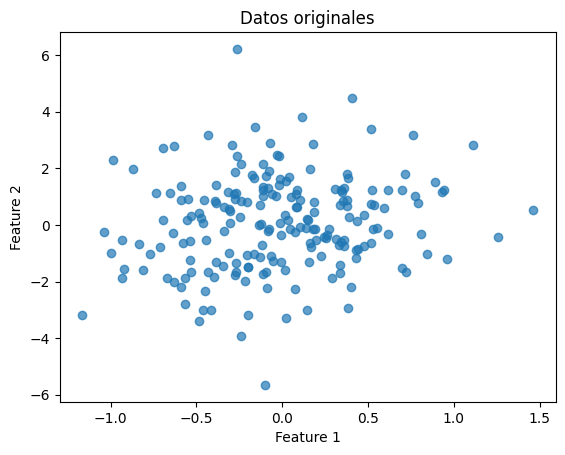

In [2]:
# 1. Intuición de PCA con datos sintéticos
# Generar datos 2D
np.random.seed(42)
data = np.dot(np.random.randn(2, 2), np.random.randn(2, 200)).T

# Visualizar datos originales
plt.scatter(data[:, 0], data[:, 1], alpha=0.7)
plt.title("Datos originales")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

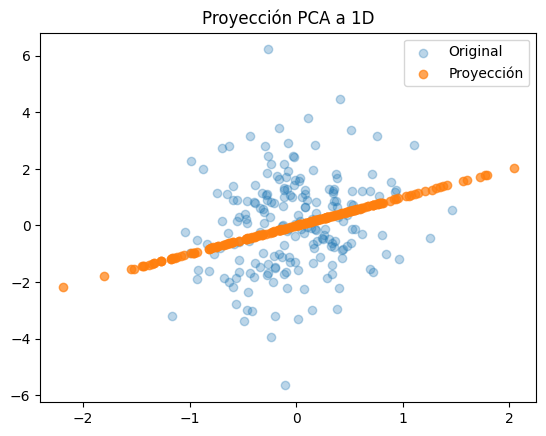

In [3]:
# Aplicar PCA para reducir a 1 dimensión
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pca = PCA(n_components=1)
data_pca = pca.fit_transform(data_scaled)

# Reconstruir los datos en 2D
data_reconstructed = pca.inverse_transform(data_pca)

# Visualizar la proyección
plt.scatter(data[:, 0], data[:, 1], alpha=0.3, label="Original")
plt.scatter(data_reconstructed[:, 0], data_reconstructed[:, 1], alpha=0.7, label="Proyección")
plt.title("Proyección PCA a 1D")
plt.legend()
plt.show()

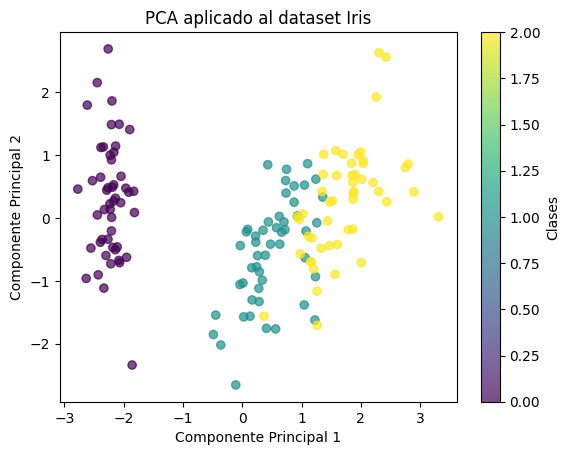

In [4]:
# 2. PCA en datos reales: Iris
iris = load_iris()
X = iris.data
y = iris.target

# Estandarizar las características
X_scaled = StandardScaler().fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar las dos primeras componentes principales
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", alpha=0.7)
plt.title("PCA aplicado al dataset Iris")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Clases")
plt.show()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


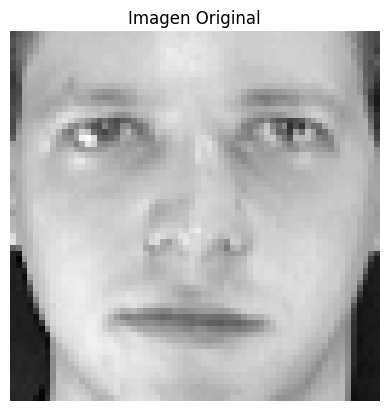

In [5]:
# 3. PCA aplicado a imágenes
from sklearn.datasets import fetch_olivetti_faces

data = fetch_olivetti_faces()
images = data.images

# Trabajar con la primera imagen
original_image = images[0]
plt.imshow(original_image, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")
plt.show()

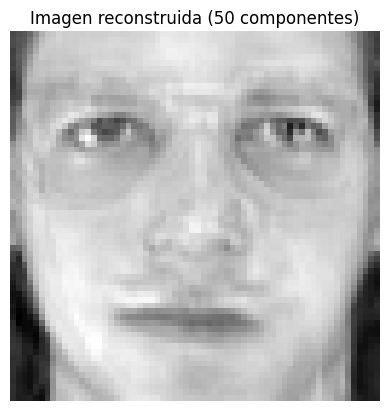

In [6]:
# Seleccionar un conjunto de imágenes en lugar de una sola
image_samples = images[:100]  # Usamos las primeras 100 imágenes
flattened_images = image_samples.reshape(image_samples.shape[0], -1)  # Aplanar cada imagen

# Aplicar PCA
n_components = 50
pca = PCA(n_components=n_components)
compressed_images = pca.fit_transform(flattened_images)

# Reconstruir la primera imagen
reconstructed_image = pca.inverse_transform(compressed_images[0]).reshape(original_image.shape)

# Visualizar la imagen reconstruida
plt.imshow(reconstructed_image, cmap="gray")
plt.title(f"Imagen reconstruida ({n_components} componentes)")
plt.axis("off")
plt.show()

In [7]:
print(images.shape)
print(flattened_images.shape)
print(compressed_images.shape)

(400, 64, 64)
(100, 4096)
(100, 50)


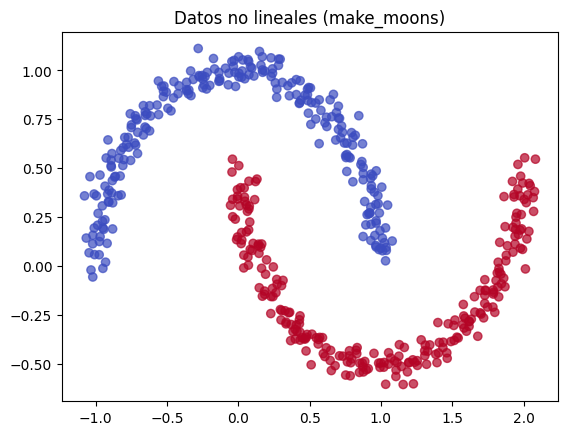

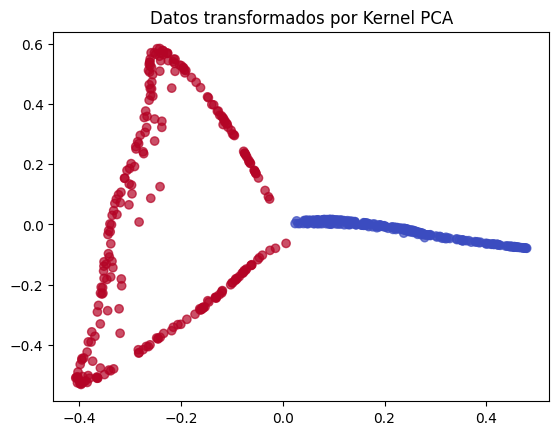

In [8]:
# 4. PCA no lineal: Kernel PCA
from sklearn.decomposition import KernelPCA

# Generar datos no lineales
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", alpha=0.7)
plt.title("Datos no lineales (make_moons)")
plt.show()

# Aplicar Kernel PCA
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=15)
X_kpca = kpca.fit_transform(X)

# Visualizar los datos transformados
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap="coolwarm", alpha=0.7)
plt.title("Datos transformados por Kernel PCA")
plt.show()

## <font color='green'>**Actividad 1**</font>


El objetivo de esta actividad es aplicar el siguiente procedimiento para calcular las componentes principales y posteriormente visualizar las dos primeras componentes..


![Visualizando](https://drive.google.com/uc?export=view&id=1h7ea0kZsG4WIekE_CYAaFoeoF4EByTYz)







Vamos a analizar, un data set súper simple para aprender., Asi que vamos por con el conocido conjunto de datos Iris. Inicialmente tiene solo 4 características, aún imposible de visualizar y utilizaremos PCA para visualizar caracteristicas.

![Iris](https://drive.google.com/uc?export=view&id=1wB6sEo2oIupsW3ZBEgj9CYotC-07m-Tv)

Procedimiento:

1. Cargue la la siguiente data y transformelo a numpy.

```
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
```

2. Visualice la data y observe que tienen distintos valores. Por lo tanto es necesario normalizar la data. Utilice

```
from sklearn.preprocessing import StandardScaler
```
3. Calcule la matriz de covariaza sobre las features.

```
features = X_scaled.T
cov_matrix = np.cov(features)
```

4. Calcule los autovalores, autovectores y el contenido de información de cada componente.



```
print(100*eig_val_cov/eig_val_cov.sum())
```

5. Proyecte las dos primeras componentes.

```
projected_1 = X_scaled.dot(eig_vec_cov.T[0])
```

6. Visualice las dos primeras componentes.

7. Compare el resultado con pca de sklearn.





In [9]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

X = df.to_numpy()
print(X[:5])

[[5.1 3.5 1.4 0.2 'setosa']
 [4.9 3.0 1.4 0.2 'setosa']
 [4.7 3.2 1.3 0.2 'setosa']
 [4.6 3.1 1.5 0.2 'setosa']
 [5.0 3.6 1.4 0.2 'setosa']]


Primeras 5 filas del dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Matriz de covarianza:
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]

Varianza explicada (%):
[72.77045209 23.03052327  3.68383196  0.51519268]

Autovalores ordenados:
[2.93035378 0.92740362 0.14834223 0.02074601]

Forma de los datos proyectados: (150, 2)


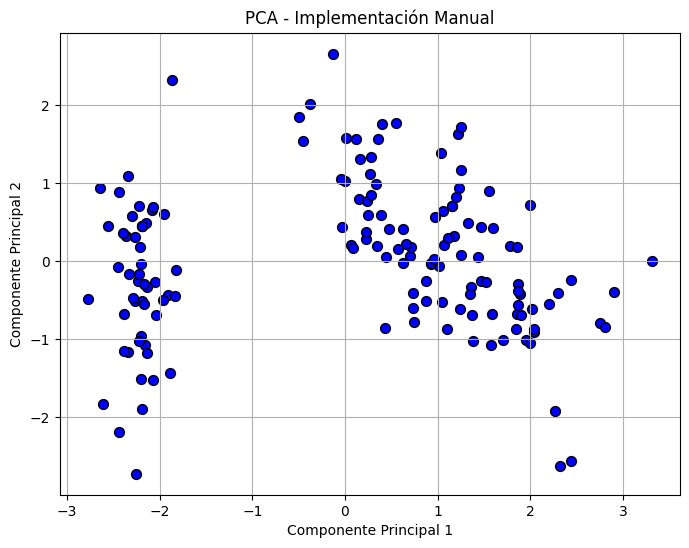


Forma de los datos transformados con sklearn PCA: (150, 2)


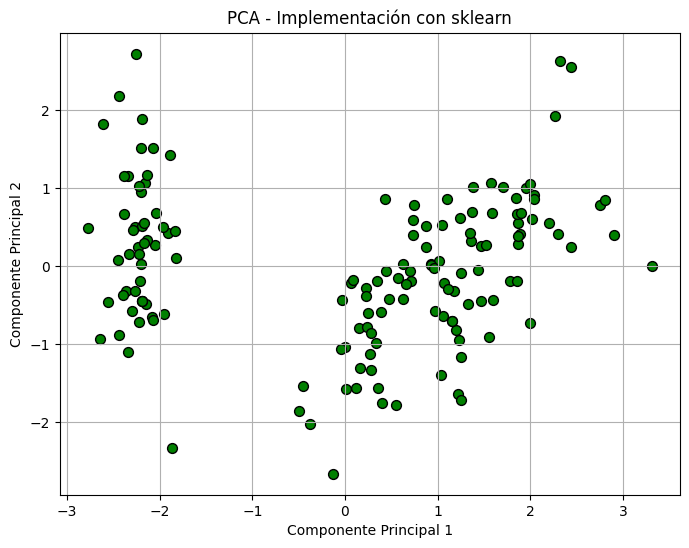


Varianza explicada con sklearn PCA:
[0.72770452 0.23030523]


In [10]:
# Tu código aquí ...

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargar el dataset Iris
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
print("Primeras 5 filas del dataset:")
print(df.head())

# Seleccionar solo las 4 características numéricas (se eliminan columnas no numéricas, e.g., 'species')
X = df.iloc[:, :4].to_numpy()

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular la matriz de covarianza (se utiliza la transpuesta de X_scaled)
features = X_scaled.T
cov_matrix = np.cov(features)
print("\nMatriz de covarianza:")
print(cov_matrix)

# Calcular autovalores y autovectores de la matriz de covarianza
eig_vals_cov, eig_vec_cov = np.linalg.eig(cov_matrix)

# Calcular el porcentaje de varianza explicada por cada componente
explained_variance = 100 * eig_vals_cov / np.sum(eig_vals_cov)
print("\nVarianza explicada (%):")
print(explained_variance)

# Ordenar autovalores y autovectores de mayor a menor
idx = np.argsort(eig_vals_cov)[::-1]
eig_vals_cov = eig_vals_cov[idx]
eig_vec_cov = eig_vec_cov[:, idx]
print("\nAutovalores ordenados:")
print(eig_vals_cov)

# Proyectar los datos en las dos primeras componentes principales
projected_data = X_scaled.dot(eig_vec_cov[:, :2])
print("\nForma de los datos proyectados:", projected_data.shape)

# Visualización de la proyección manual de las dos primeras componentes
plt.figure(figsize=(8,6))
plt.scatter(projected_data[:,0], projected_data[:,1], c='blue', edgecolor='k', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Implementación Manual')
plt.grid(True)
plt.show()

# Comparación con PCA de sklearn
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
print("\nForma de los datos transformados con sklearn PCA:", pca_result.shape)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c='green', edgecolor='k', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Implementación con sklearn')
plt.grid(True)
plt.show()

# Mostrar el porcentaje de varianza explicada por sklearn PCA
print("\nVarianza explicada con sklearn PCA:")
print(pca.explained_variance_ratio_)

<font color='green'>Fin Actividad 1</font>

## <font color='green'>Actividad 2</font>
Compresión de una imagen a través del uso de PCA.

Determine la cantidad de componentes necesarias para obtener una calidad adecuada. Primero realice un PCA y posteriormente invierta la transformación con las componentes seleccionadas.


```
import numpy as np
import glob
import cv2
path1 = 'ruta imagenes'
images = []
for path in glob.glob(path1+"test/*.jpg"):
    images.append(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY))
```


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Leemos nuestras imagenes
import numpy as np
import glob
import cv2
path1 = '/content/drive/MyDrive/Gonzalo/CD-P2 APRENDIZAJE NO SUPERVISADO/Clase 5'
images = []
for path in glob.glob(path1+"/*.jpg"): #Leemos todas las imagenes
  images.append(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY))


In [13]:
#Trabajaremos solo con la primera
print(images[0].shape)

(225, 225)


Tamaño de la imagen: (225, 225)


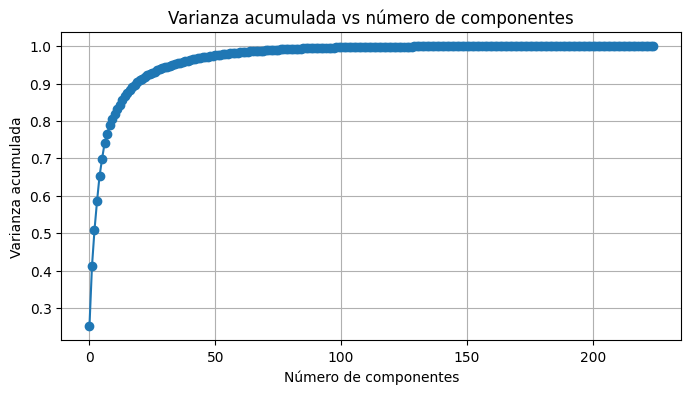

Número de componentes necesarios para el 95% de la varianza: 34


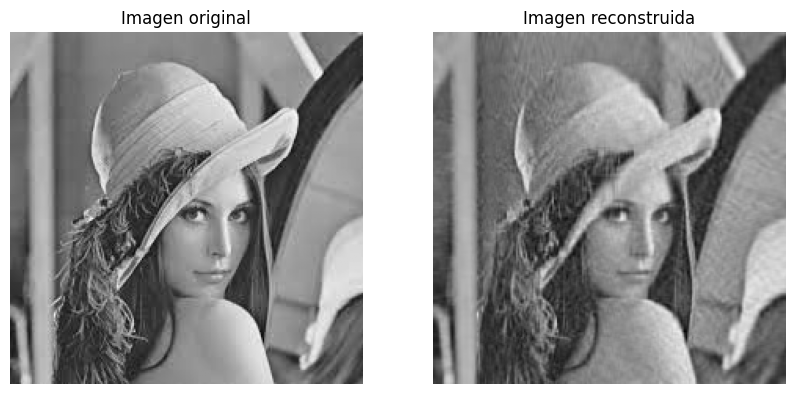

In [14]:
# Tu código aquí ...

# Tips

#import matplotlib.pyplot as plt
#plt.figure(figsize=[8,8])
#lt.imshow(image_recon,cmap = plt.cm.gray)

import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Leer imágenes (se asume que ya se montó el drive y se cargaron las imágenes)
path1 = '/content/drive/MyDrive/Gonzalo/CD-P2 APRENDIZAJE NO SUPERVISADO/Clase 5'
images = []
for path in glob.glob(path1 + "/*.jpg"):  # Leemos todas las imágenes
    images.append(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY))

# Trabajaremos con la primera imagen
img = images[0]
print("Tamaño de la imagen:", img.shape)  # Por ejemplo: (225, 225)

# Realizamos PCA considerando cada fila de la imagen como una observación
# Inicialmente, usamos el máximo número de componentes (225)
pca = PCA(n_components=img.shape[1])
pca.fit(img)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Graficamos la varianza acumulada para visualizar cuántos componentes necesitamos
plt.figure(figsize=(8,4))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Varianza acumulada vs número de componentes')
plt.grid(True)
plt.show()

# Seleccionamos el número mínimo de componentes que explique al menos el 95% de la varianza
threshold = 0.95
n_components = np.argmax(cumulative_variance >= threshold) + 1
print("Número de componentes necesarios para el 95% de la varianza:", n_components)

# Ahora, aplicamos PCA usando el número de componentes seleccionado
pca_selected = PCA(n_components=n_components)
img_transformed = pca_selected.fit_transform(img)
img_reconstructed = pca_selected.inverse_transform(img_transformed)

# Mostramos la imagen original y la imagen reconstruida
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_reconstructed, cmap='gray')
plt.title('Imagen reconstruida')
plt.axis('off')

plt.show()

<font color='green'>Fin Actividad 2</font>

## <font color='green'>Actividad 3</font>
Desafío 2: Realice esto mismo pero para el caso de una imagen color

```
from sklearn.decomposition import PCA
import cv2
# Para leer la imagen
img = cv2.imread(path1+ 'test/Pajaro.png')
```

In [25]:
# Tu código aquí ...


import numpy as np
import glob
import cv2
path1 = '/content/drive/MyDrive/Gonzalo/CD-P2 APRENDIZAJE NO SUPERVISADO/Clase 5'
images = []
for path in glob.glob(path1+"/*.png"): #Leemos todas las imagenes
  images.append(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY))


  from sklearn.decomposition import PCA
import cv2
# Para leer la imagen
img = cv2.imread(path1+ 'UL06_2.png')

Forma de la imagen: (256, 349, 3)
Canal 0 -> 12 componentes para retener el 95.0% de la varianza
Canal 1 -> 14 componentes para retener el 95.0% de la varianza
Canal 2 -> 15 componentes para retener el 95.0% de la varianza


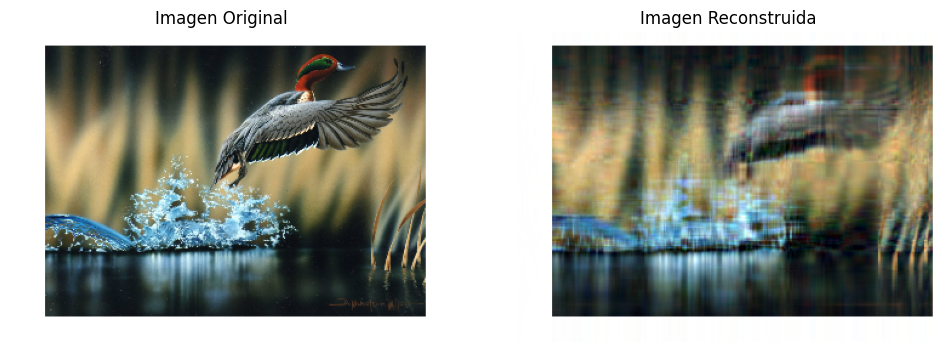

In [28]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Definir el path base
path1 = '/content/drive/MyDrive/Gonzalo/CD-P2 APRENDIZAJE NO SUPERVISADO/Clase 5'

# Construir la ruta completa a la imagen
img_path = os.path.join(path1, 'UL06_2.png')

# Leer la imagen
img = cv2.imread(img_path)

# Verificar si se cargó la imagen correctamente
if img is None:
    print(f"No se pudo cargar la imagen. Verifica la ruta: {img_path}")
else:
    # Convertir de BGR a RGB para visualizar correctamente
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print("Forma de la imagen:", img_rgb.shape)  # Por ejemplo: (256, 349, 3)

    # Umbral de varianza a retener (por ejemplo, 95%)
    threshold = 0.95

    # Lista para almacenar cada canal reconstruido
    reconstructed_channels = []

    # Aplicar PCA a cada canal por separado
    for i in range(3):
        # Extraer canal i
        canal = img_rgb[:, :, i]

        # Para cada canal, el máximo número de componentes permitidos es el mínimo entre filas y columnas
        n_max_components = min(canal.shape)

        # Realizar PCA con el número máximo de componentes
        pca_full = PCA(n_components=n_max_components)
        pca_full.fit(canal)
        cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

        # Determinar el número mínimo de componentes para alcanzar el umbral deseado
        n_components = np.argmax(cumulative_variance >= threshold) + 1
        print(f"Canal {i} -> {n_components} componentes para retener el {threshold*100}% de la varianza")

        # Aplicar PCA con el número seleccionado de componentes
        pca = PCA(n_components=n_components)
        canal_transformado = pca.fit_transform(canal)
        canal_reconstruido = pca.inverse_transform(canal_transformado)

        # Almacenar el canal reconstruido
        reconstructed_channels.append(canal_reconstruido)

    # Reconstruir la imagen combinando los canales (asegurándonos de mantener la forma original)
    img_reconstructed = np.stack(reconstructed_channels, axis=2)

    # Convertir a uint8 y recortar valores fuera de rango (0 a 255)
    img_reconstructed = np.clip(img_reconstructed, 0, 255).astype(np.uint8)

    # Mostrar la imagen original y la reconstruida
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_reconstructed)
    plt.title('Imagen Reconstruida')
    plt.axis('off')

    plt.show()

<font color='green'>Fin Actividad 3</font>

## <font color='green'>Actividad 4</font>

Esta actividad tiene por objetivo extender los conceptos de PCA para el caso que existan comportamientos no lineales. Para esto se utilizará el concepto de Kernel utilizado en SVM.

**Kernel PCA:** PCA es un método lineal. Es decir, solo se puede aplicar a conjuntos de datos que son linealmente separables. Pero, si lo usamos para conjuntos de datos no lineales, podríamos obtener un resultado que puede no ser la reducción de dimensionalidad óptima. Kernel PCA utiliza una función de kernel para proyectar el conjunto de datos en un espacio de características de mayor dimensión, donde es linealmente separable. Es similar a la idea de Support Vector Machines.

Hay varios métodos de kernel como lineal, polinomial y gaussiano.

![Visualizando](https://drive.google.com/uc?export=view&id=1IjMqDaBhF60Y4px5dKzuuGeE7eI4Ey8V)

En la imagen anterior, los datos estan en dos dimensiones. Los denotaremos por $x=(x_1,x_2)$. EN su forma original, los datos son inseparables en su espacio. Sin emabrgo a traves de la aplicación de una funcion kernel lo podemos transformar para ser separable linealmente.

$$ \phi \rightarrow x_1^2,x_2^2,\sqrt{2}x_1x_2$$

1. Utilice el conjunto de datos make_moons, genere un dataset y visualice su forma.

2. Aplique el método de PCA y visualice sus componentes.

3. Aplique el método de kernel PCA y visualice sus componentes.

4. Genere alguna conclusión.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 500, noise = 0.02, random_state = 417)

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

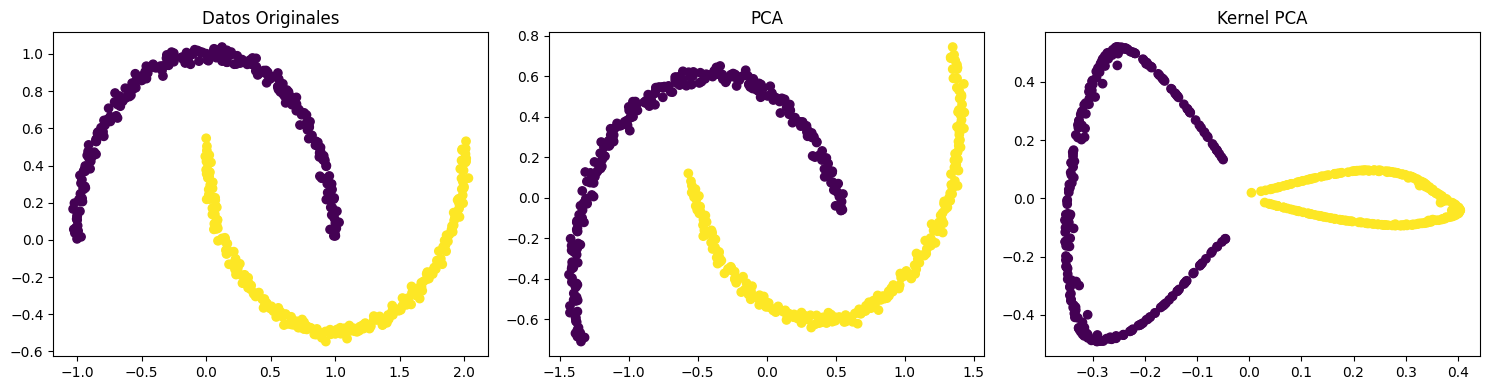

In [29]:
# Tu código aquí ...

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA, KernelPCA

# Generamos el dataset
X, y = make_moons(n_samples=500, noise=0.02, random_state=417)

# Visualizamos los datos originales
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Datos Originales")

# Aplicamos PCA (método lineal)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("PCA")

# Aplicamos Kernel PCA (utilizando el kernel RBF)
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)

plt.subplot(1, 3, 3)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis')
plt.title("Kernel PCA")

plt.tight_layout()
plt.show()

<font color='green'>Fin Actividad 4</font>

<img src="https://drive.google.com/uc?export=view&id=1bqkJJ7QiIOTsp-7jm5eUtK-XYWMEq2_K" width="100" align="left" />
<br clear="left">

## <font color='blue'>**Resumen**</font>

PCA es una técnica de reducción de dimensionalidad utilizada en el análisis de datos y el aprendizaje automático. Su objetivo principal es transformar un conjunto de datos con múltiples características en un conjunto de dimensiones más bajas mientras se conserva la mayor cantidad posible de variabilidad.

Funcionamiento:

1. Identificación de componentes: PCA busca las direcciones (componentes principales) a lo largo de las cuales los datos tienen la mayor variabilidad.

2. Proyección: Los datos originales se proyectan en el espacio definido por los componentes principales.

3. Selección de componentes: Se pueden seleccionar los componentes principales más significativos o reducir la dimensionalidad manteniendo solo los primeros componentes.

Ventajas de PCA:

1. Reducción de dimensionalidad: Permite reducir la cantidad de características sin perder mucha información, lo que simplifica el análisis y acelera los algoritmos de aprendizaje automático.

2. Eliminación de correlación: PCA transforma las características correlacionadas en componentes no correlacionados, lo que puede mejorar la interpretación de los datos.

3. Visualización: PCA permite visualizar datos en dimensiones reducidas para entender mejor la estructura de los datos.

Desventajas de PCA:

1. Pérdida de interpretabilidad: Los componentes principales son combinaciones lineales de características originales, lo que puede dificultar la interpretación de los nuevos ejes.

2. Sensibilidad a escalas: La escala de las características puede afectar el resultado de PCA, por lo que es necesario escalar los datos antes de aplicarlo.

3. No linealidad: PCA es adecuado para identificar patrones lineales en los datos, pero puede no ser efectivo para relaciones no lineales.

Ejemplos de aplicaciones de PCA:

1. Análisis de imágenes: En el procesamiento de imágenes, PCA se usa para reducir la cantidad de píxeles y extraer características principales para reconocimiento de objetos.

2. Reconocimiento de patrones: En aprendizaje automático, PCA puede utilizarse como preprocesamiento para reducir la dimensionalidad de los datos antes de entrenar modelos de clasificación.

3. Biometría: En aplicaciones de reconocimiento facial, PCA puede ayudar a reducir la cantidad de características faciales y mejorar la precisión del reconocimiento.

4. Análisis de datos financieros: En finanzas, PCA se utiliza para identificar las principales tendencias y factores que afectan los rendimientos de activos financieros.

En resumen, PCA es una técnica poderosa para reducir la dimensionalidad de los datos, lo que puede mejorar la eficiencia y rendimiento de los modelos de aprendizaje automático. Sin embargo, es importante considerar sus limitaciones y seleccionar adecuadamente el número de componentes principales para cada aplicación.

# <font color='purple'>__EXPERIMENTO__</font>

En este ejemplo se carga una imagen en escala de grises (la clásica "cámara" de skimage), se aplica PCA tratando cada fila de la imagen como una observación y cada columna como una característica, y se reconstruye la imagen utilizando solo un número limitado de componentes principales. Esto nos permite observar cómo se puede reducir la dimensión de los datos y, a la vez, retener la información más relevante.

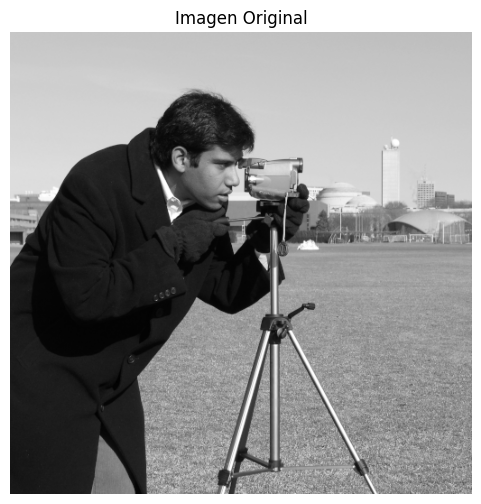

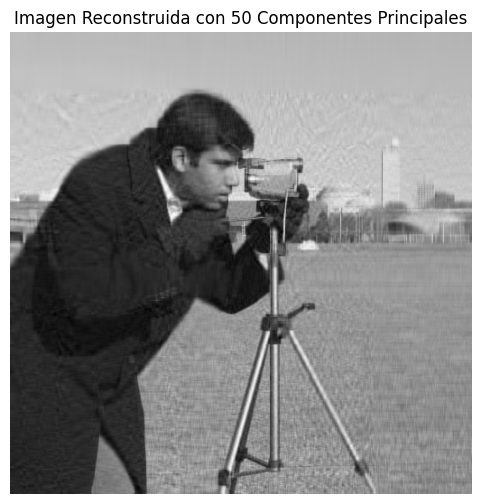

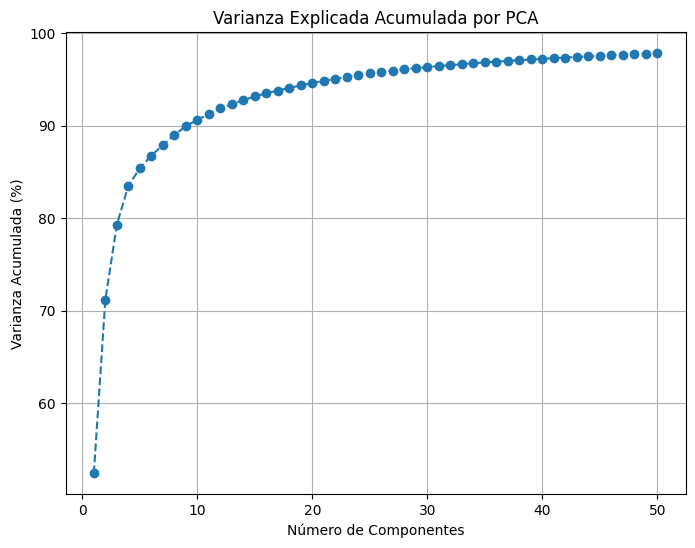

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from sklearn.decomposition import PCA

# 1. Cargar la imagen de ejemplo (imagen en escala de grises)
img = data.camera()  # Imagen de 512x512 píxeles
plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')
plt.show()

# Convertir la imagen a tipo float para el PCA
img = np.array(img, dtype=np.float64)

# 2. Aplicar PCA a la imagen
# Cada fila de la imagen se considera como una muestra, y cada columna, como una característica.
n_components = 50  # Número de componentes principales a retener (se puede experimentar con este valor)
pca = PCA(n_components=n_components)
img_transformed = pca.fit_transform(img)
img_reconstructed = pca.inverse_transform(img_transformed)

# 3. Visualizar la imagen reconstruida
plt.figure(figsize=(6,6))
plt.imshow(img_reconstructed, cmap='gray')
plt.title(f"Imagen Reconstruida con {n_components} Componentes Principales")
plt.axis('off')
plt.show()

# 4. Visualizar la varianza explicada acumulada
var_explained = np.cumsum(pca.explained_variance_ratio_) * 100  # en porcentaje
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, n_components+1), var_explained, marker='o', linestyle='--')
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Acumulada (%)")
plt.title("Varianza Explicada Acumulada por PCA")
plt.grid(True)
plt.show()


Este pequeño experimento ilustra de manera práctica cómo se puede utilizar PCA para transformar y reconstruir datos visuales, demostrando la potencia de la reducción de dimensionalidad en aplicaciones reales.

# <font color='purple'>__FIN EXPERIMENTO__</font>

# <font color='purple'>__MATERIAL ADICIONAL__</font>

Curiosidades y Aplicaciones Prácticas
Relación con SVD (Singular Value Decomposition):
La técnica de PCA puede calcularse mediante la descomposición en valores singulares (SVD). Esta conexión es fundamental, ya que SVD es una herramienta robusta en álgebra lineal y permite la aplicación de PCA en conjuntos de datos donde la matriz de covarianza puede no ser fácilmente invertible.

Interpretación Geométrica:
Los componentes principales se interpretan como direcciones en el espacio de los datos en las que la varianza es máxima. Esto significa que si proyectamos nuestros datos en estos ejes, obtenemos una representación en la que se retiene la mayor parte de la información (varianza) de los datos originales, lo que resulta muy útil en visualización y compresión.

Sensibilidad a la Escala:
Una característica importante de PCA es su sensibilidad a la escala de las variables. Por ello, es común estandarizar (normalizar) los datos antes de aplicar PCA, de manera que todas las variables contribuyan equitativamente a la determinación de las componentes.

Aplicaciones en Compresión de Imágenes:
PCA se ha utilizado en compresión de imágenes, donde se pueden representar imágenes de alta dimensión (por ejemplo, imágenes en escala de grises) mediante un número reducido de componentes, logrando una reconstrucción aproximada pero eficiente en términos de almacenamiento. Este concepto se aprovechó en el experimento propuesto para visualizar la imagen original versus la reconstruida.

Reducción de Ruido y Detección de Patrones:
Al eliminar componentes que representan una pequeña fracción de la varianza (generalmente asociadas al ruido), PCA puede ayudar a mejorar la calidad de la señal en tareas de procesamiento de imágenes o en la limpieza de datos para análisis posteriores.

Limitaciones y Consideraciones:

No Linealidad: PCA es un método lineal y puede no captar relaciones complejas o no lineales entre variables, motivo por el cual se han desarrollado métodos como el Kernel PCA.
Interpretabilidad: Aunque reduce la dimensionalidad, la interpretación de cada componente puede resultar abstracta, ya que se trata de combinaciones lineales de las variables originales.
Robustez a Outliers: PCA puede verse fuertemente afectado por valores atípicos, lo que en algunos casos requiere el uso de versiones robustas del algoritmo.

**Fuentes Bibliográficas**


Jolliffe, I. T. (2002). Principal Component Analysis. Springer Series in Statistics.
Una referencia clásica y completa que profundiza en los fundamentos teóricos y aplicaciones de PCA. citeJolliffe2002

Shlens, J. (2014). A Tutorial on Principal Component Analysis.
Un tutorial práctico y accesible que explica la matemática subyacente a PCA y su aplicación en diferentes campos, ideal para quienes se inician en el tema. citeShlens2014

**Conclusión**

PCA es una herramienta poderosa en el análisis de datos, no solo por su capacidad para reducir la dimensionalidad y facilitar la visualización, sino también por su utilidad en compresión, reducción de ruido y preprocesamiento en machine learning. Aunque presenta limitaciones al tratar con relaciones no lineales o ser sensible a la escala y outliers, su interpretación geométrica y su conexión con métodos de álgebra lineal como SVD la hacen fundamental para entender y explorar grandes conjuntos de datos.

Estas curiosidades y referencias pueden servirte como material adicional para profundizar en el estudio de PCA y enriquecer tus experimentos y análisis.

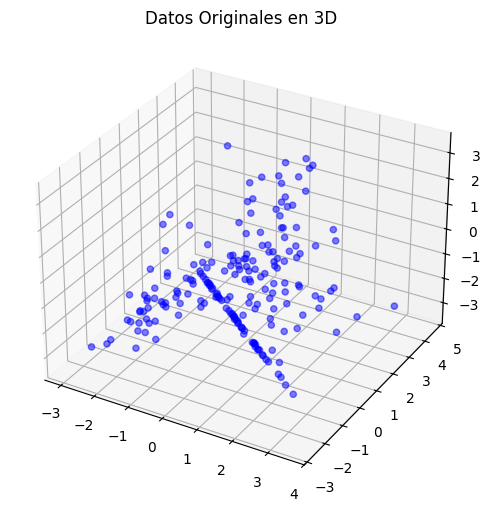

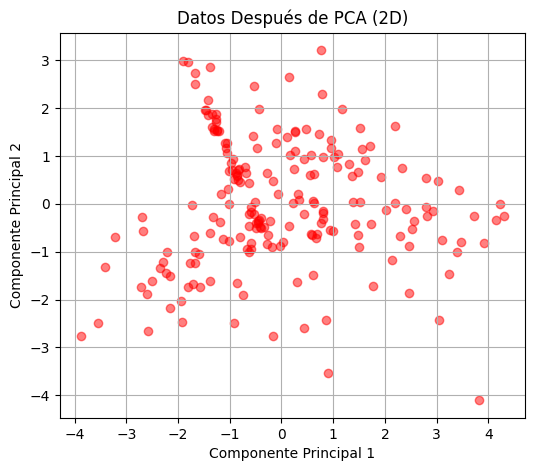

Varianza explicada por cada componente: [0.51684771 0.33009701]
Varianza total explicada: 84.69%


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

# Generamos un dataset de ejemplo en 3D
np.random.seed(42)
X, _ = make_classification(n_samples=200, n_features=3, n_informative=3, n_redundant=0, random_state=42)

# Visualizamos los datos en 3D antes de aplicar PCA
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='b', alpha=0.5)
ax.set_title("Datos Originales en 3D")
plt.show()

# Aplicamos PCA para reducir la dimensionalidad de 3D a 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualizamos los datos transformados en 2D
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='r', alpha=0.5)
plt.title("Datos Después de PCA (2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

# Explicamos cuánta varianza explica cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por cada componente: {explained_variance}")
print(f"Varianza total explicada: {sum(explained_variance) * 100:.2f}%")


# <font color='purple'>__FIN MATERIAL ADICIONAL__</font>